In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV
import joblib
from tokenizer import tokenize_sentence

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("./data/dataset_test_english.csv", sep=",")

In [3]:
train_df = pd.read_csv("./data/dataset_train_english.csv", sep=",")

In [4]:
df.dtypes

Unnamed: 0      int64
comment        object
type          float64
dtype: object

In [5]:
df.head(5)

,Unnamed: 0,comment,type
0,0,I went and saw this movie last night after bei...,1.0
1,1,Actor turned director Bill Paxton follows up h...,1.0
2,2,As a recreational golfer with some knowledge o...,1.0
3,3,"I saw this film in a sneak preview, and it is ...",1.0
4,4,Bill Paxton has taken the true story of the 19...,1.0


In [6]:
df["type"] = df["type"].apply(int)
train_df["type"] = train_df["type"].apply(int)

In [7]:
df[df['type'] == 1].head(5)

,Unnamed: 0,comment,type
0,0,I went and saw this movie last night after bei...,1
1,1,Actor turned director Bill Paxton follows up h...,1
2,2,As a recreational golfer with some knowledge o...,1
3,3,"I saw this film in a sneak preview, and it is ...",1
4,4,Bill Paxton has taken the true story of the 19...,1


In [8]:
df[df['type'] == 0].head(5)

,Unnamed: 0,comment,type
12500,12500,Once again Mr. Costner has dragged out a movie...,0
12501,12501,This is an example of why the majority of acti...,0
12502,12502,"First of all I hate those moronic rappers, who...",0
12503,12503,Not even the Beatles could write songs everyon...,0
12504,12504,Brass pictures (movies is not a fitting word f...,0


In [9]:
sentence_example = df.iloc[1]["comment"]
tokenize_sentence(sentence_example)

['actor',
 'turn',
 'director',
 'bill',
 'paxton',
 'follow',
 'promis',
 'debut',
 'gothic-horror',
 '``',
 'frailti',
 "''",
 'famili',
 'friend',
 'sport',
 'drama',
 '1913',
 'u.s.',
 'open',
 'young',
 'american',
 'caddi',
 'rise',
 'humbl',
 'background',
 'play',
 'bristish',
 'idol',
 'dub',
 '``',
 'the',
 'greatest',
 'game',
 'ever',
 'play',
 "''",
 'i',
 "'m",
 'fan',
 'golf',
 'scrappi',
 'underdog',
 'sport',
 'flick',
 'dime',
 'dozen',
 'recent',
 'done',
 'grand',
 'effect',
 '``',
 'miracl',
 "''",
 '``',
 'cinderella',
 'man',
 "''",
 'film',
 'enthral',
 'same.th',
 'film',
 'start',
 'creativ',
 'open',
 'credit',
 'imagin',
 'disneyfi',
 'version',
 'anim',
 'open',
 'credit',
 'hbo',
 "'s",
 '``',
 'carnival',
 "''",
 '``',
 'rome',
 "''",
 'lumber',
 'along',
 'slowli',
 'first',
 'by-the-numb',
 'hour',
 'onc',
 'action',
 'move',
 'u.s.',
 'open',
 'thing',
 'pick',
 'well',
 'paxton',
 'nice',
 'job',
 'show',
 'knack',
 'effect',
 'directori',
 'flourish'

In [15]:
vectorizer = TfidfVectorizer(tokenizer=tokenize_sentence)

In [16]:
features = vectorizer.fit_transform(train_df["comment"])

In [17]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df["type"])

LogisticRegression(random_state=0)

In [18]:
model.predict(features[0])

array([1], dtype=int64)

In [19]:
train_df["comment"].iloc[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [20]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=tokenize_sentence)),
    ("model", LogisticRegression(random_state=0))
]
)

In [21]:
model_pipeline.fit(train_df["comment"], train_df["type"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokenize_sentence at 0x0000019C1B5910D0>)),
                ('model', LogisticRegression(random_state=0))])

In [22]:
pos_text = df['comment'].iloc[0]
neg_text = df[df['type']==0]['comment'].iloc[0]

In [23]:
pos_text

"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."

In [24]:
neg_text

"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in."

In [25]:
model_pipeline.predict([pos_text])

array([1], dtype=int64)

In [26]:
model_pipeline.predict([neg_text])

array([0], dtype=int64)

In [27]:
precision_score(y_true=df["type"], y_pred=model_pipeline.predict(df["comment"]))

0.8768335459183674

In [28]:
recall_score(y_true=df["type"], y_pred=model_pipeline.predict(df["comment"]))

KeyboardInterrupt: 

In [ ]:
prec, rec, thresholds = precision_recall_curve(y_true=df["type"], probas_pred=model_pipeline.predict_proba(df["comment"])[:, 1])

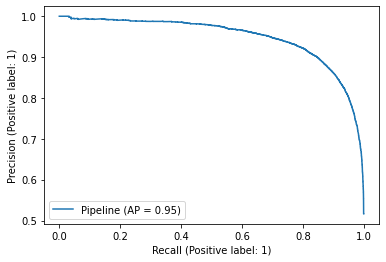

In [ ]:
plot_precision_recall_curve(estimator=model_pipeline, X=df["comment"], y=df["type"])

In [ ]:
min_threshold = np.where(prec > 0.95)[0][0]
min_threshold

14969

In [ ]:
np.where(prec > 0.95)

(array([14969, 14970, 14971, ..., 24020, 24021, 24022], dtype=int64),)

In [ ]:
thresholds[min_threshold]

0.6937939088670825

In [ ]:
precision_score(y_true=df["type"], y_pred=model_pipeline.predict_proba(df["comment"])[:, 1] > thresholds[min_threshold])

0.950197889182058

In [ ]:
recall_score(y_true=df["type"], y_pred=model_pipeline.predict_proba(df["comment"])[:, 1] > thresholds[min_threshold])

0.69144

In [ ]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=tokenize_sentence)),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid={'C': [0.1, 1, 10.]},
        cv=3,
         verbose=4
        )
    )
])

In [ ]:
grid_pipeline.fit(train_df["comment"], train_df["type"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.832 total time=   0.3s
[CV 2/3] END .............................C=0.1;, score=0.832 total time=   0.4s
[CV 3/3] END .............................C=0.1;, score=0.846 total time=   0.4s
[CV 1/3] END ...............................C=1;, score=0.852 total time=   0.8s
[CV 2/3] END ...............................C=1;, score=0.847 total time=   0.4s
[CV 3/3] END ...............................C=1;, score=0.859 total time=   0.9s


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.832 total time=   1.2s


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.830 total time=   1.3s


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ............................C=10.0;, score=0.847 total time=   1.3s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokenize_sentence at 0x000001B2BDE4EB80>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [ ]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=tokenize_sentence)),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)

In [ ]:
model_pipeline_c_10.fit(train_df["comment"], train_df["type"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokenize_sentence at 0x000001B2BDE4EB80>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [ ]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=df["type"], probas_pred=model_pipeline_c_10.predict_proba(df["comment"])[:, 1])

In [ ]:
min_thresholdC10 = np.where(prec_c_10 > 0.95)[0][0]

In [ ]:
np.where(prec_c_10 > 0.95)

(array([14856, 14857, 14858, ..., 23660, 23661, 23662], dtype=int64),)

In [ ]:
precision_score(y_true=df["type"], y_pred=model_pipeline_c_10.predict_proba(df["comment"])[:, 1] > thresholds_c_10[min_thresholdC10])

0.9500564971751413

In [ ]:
recall_score(y_true=df["type"], y_pred=model_pipeline_c_10.predict_proba(df["comment"])[:, 1] > thresholds_c_10[min_thresholdC10])

0.67264

In [29]:
joblib.dump(model_pipeline, 'modelpipeline.joblib')

['modelpipeline.joblib']

In [ ]:
joblib.dump(model_pipeline_c_10, 'modelpipeline_c_10.pkl')

['modelpipeline_c_10.pkl']